# Neural Networks on Fashion MNIST Dataset

## Objective
In this week's exercise, you will:
1. Utilize callback functions to monitor model's performance during training.
2. Experiment with different layer sizes to observe their effects on prediction accuracy and training speed.
3. Implement pixel value normalization to improve network training speed.
4. Construct a multilayer neural network to classify the Fashion MNIST image dataset.

---

## Step 1: Import Libraries
Let's start by importing the necessary libraries.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist as fm


---

## Step 2: Load and Preprocess the Data
We'll load the Fashion MNIST dataset and then normalize the pixel values.


In [10]:
# TODO Load the dataset using the fashion_mnist.load_data() function
(train_images, train_labels), (test_images, test_labels) = fm.load_data()

# TODO Normalize the pixel values to be in range 0..1
train_images, test_images = train_images / 255.0, test_images / 255.0

---

## Step 3: Visualize the Data
Display some samples from the dataset.


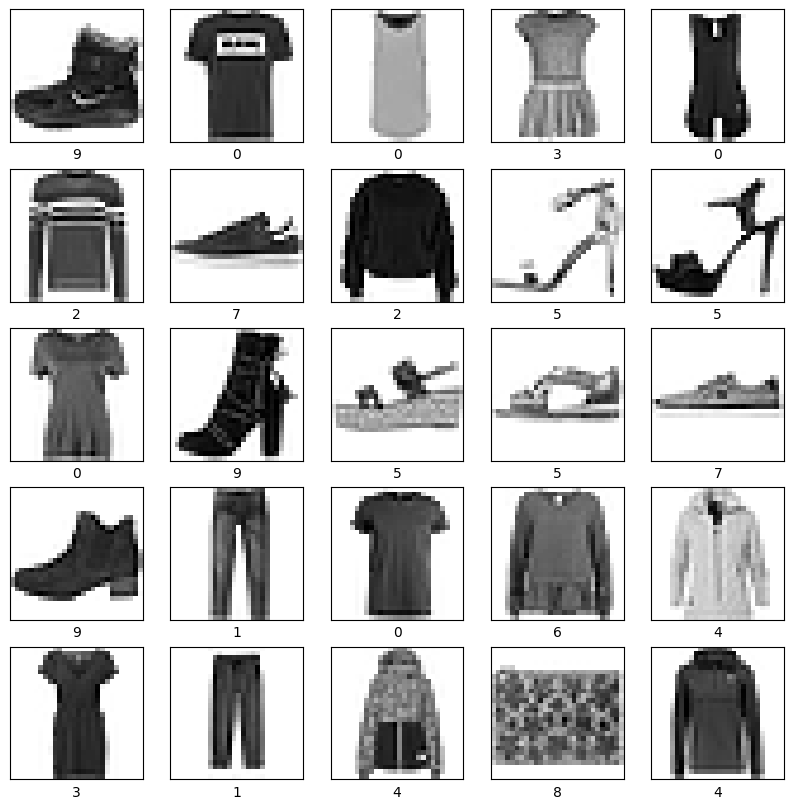

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

---

## Step 4: Define a Callback
Let's define a callback to monitor the model's accuracy during training.


In [ ]:
# TODO define a callback that interrupts training after an accuracy of 90% is reached
class AccuracyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
      if (logs.get('accuracy') > 0.9):
        print("\nAccuracy of 90% reached - stopping training.\n")
        self.model.stop_training = True

accuracy_callback = AccuracyCallback()

: 

---

## Step 5: Build a Neural Network
We will start with a simple neural network and then experiment with different layer sizes.


In [13]:
# TODO build an initial model (hint: you might need to flatten the input in the beginning)
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# TODO compile your model, choose an optimizer, a loss function
# and a metric for measuring training performance



---

## Step 6: Train the Model
Train the model using the training data and your callback function.


In [16]:

model.fit(train_images, train_labels, epochs=10, callbacks=[accuracy_callback])

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4765 - accuracy: 0.8295
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3576 - accuracy: 0.8694
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3222 - accuracy: 0.8811
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2988 - accuracy: 0.8891
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2790 - accuracy: 0.8953
Epoch 6/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.2641 - accuracy: 0.9012
Accuracy of 90% reached - stopping training.

1875/1875 [==============================] - 13s 7ms/step - loss: 0.2642 - accuracy: 0.9012


---

## Step 7: Evaluate the Model
Evaluate the model using the test data.


In [17]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_accuracy*100:.2f}%")


313/313 [==============================] - 1s 3ms/step - loss: 0.3364 - accuracy: 0.8775
Test accuracy: 87.75%


---

## Step 8: Experiment with Layer Sizes
Modify the neural network architecture by changing the layer sizes, and note the effects on training speed and prediction accuracy. You are encouraged to experiment with various configurations.
